In [42]:
using Images
using ImageFiltering
using PyCall

In [43]:
PyCall.pyprogramname
rasterio = pyimport("rasterio")

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


PyObject <module 'rasterio' from '/anaconda3/lib/python3.6/site-packages/rasterio/__init__.py'>

In [74]:
f = open("dem_path.txt")
path = readlines(f)
dem = rasterio.open("/Users/eyu/YOEO_local/data/srtm_38_01/yolo.tif")
#dem = rasterio.open(path[1])

proj_create: init=epsg:/init=IGNF: syntax not supported in non-PROJ4 emulation mode


PyObject <open DatasetReader name='/Users/eyu/YOEO_local/data/srtm_38_01/yolo.tif' mode='r'>

In [75]:
println(keys(dem))

Symbol[:__class__, :__delattr__, :__dict__, :__dir__, :__doc__, :__enter__, :__eq__, :__exit__, :__format__, :__ge__, :__getattribute__, :__gt__, :__hash__, :__init__, :__init_subclass__, :__le__, :__lt__, :__module__, :__ne__, :__new__, :__pyx_vtable__, :__reduce__, :__reduce_ex__, :__repr__, :__setattr__, :__setstate__, :__sizeof__, :__str__, :__subclasshook__, :__weakref__, :_block_shapes, :_closed, :_count, :_crs, :_crs_wkt, :_descriptions, :_dtypes, :_env, :_gcps, :_get_crs, :_handle_crswkt, :_has_band, :_mask_flags, :_nodatavals, :_offsets, :_read, :_scales, :_set_all_descriptions, :_set_all_offsets, :_set_all_scales, :_set_all_units, :_set_attrs_from_dataset_handle, :_set_crs, :_set_gcps, :_set_nodatavals, :_transform, :_units, :block_shapes, :block_size, :block_window, :block_windows, :bounds, :checksum, :close, :closed, :colorinterp, :colormap, :compression, :count, :crs, :dataset_mask, :descriptions, :driver, :dtypes, :files, :gcps, :get_gcps, :get_nodatavals, :get_tag_item, 

In [76]:
dem.meta

Dict{Any,Any} with 8 entries:
  "driver"    => "GTiff"
  "dtype"     => "int16"
  "height"    => 6000
  "nodata"    => -32768.0
  "count"     => 1
  "width"     => 6000
  "transform" => (0.000833333, 0.0, 5.0, 0.0, -0.000833333, 60.0, 0.0, 0.0, 1.0)
  "crs"       => PyObject CRS.from_epsg(4979)

In [77]:
dem.dtypes

("int16",)

In [78]:
dem_img = dem.read(1);

In [79]:
typeof(dem_img)

Array{Int16,2}

In [80]:
# check pixel near corner reflectors
window = 2

lat_1 = (56 + 33/60 + 42.5556/(60*60))
lon_1 = (8 + 18/60 + 26.874/(60*60))

row_1 = (lat_1 - 60)/(-0.0008333333333333334)
col_1 =(lon_1 - 5)/(.0008333333333333334)

dem_img[Int(round(row_1))-window:Int(round(row_1))+window, Int(round(col_1))-window:Int(round(col_1))+window]

5×5 Array{Int16,2}:
 -32768  -32768  41  43  46
 -32768      41  42  45  48
 -32768      41  41  44  48
     39      40  41  45  49
     38      39  41  45  50

In [82]:
flat_img = reshape(copy(dem_img), (1,:))
sort_img = unique(sort(flat_img, dims=2))
print("min, max:", (sort_img[2], sort_img[end]))

min, max:(-399, 1901)

In [83]:
indices = findall(x -> x==sort_img[1], dem_img);

In [84]:
rescaled_img = Array{Float64}(undef, 6000, 6000)
for i=1:size(dem_img)[1]
    for j=1:size(dem_img)[2]
        if dem_img[i,j] == sort_img[1]
            rescaled_img[i,j] = Float64(dem_img[i,j])
        else
            rescaled_img[i,j] = (dem_img[i,j] - sort_img[2])/(sort_img[end] - sort_img[2])
        end
    end
end

In [85]:
[rescaled_img[i] = NaN for i=indices];

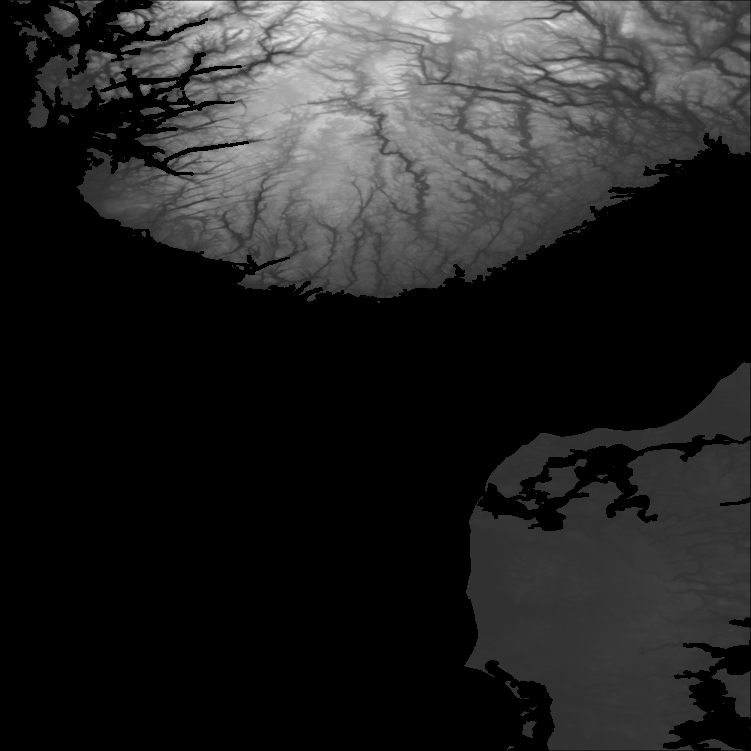

In [86]:
Gray.(rescaled_img)